/Users/imadelhanafi/anaconda/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


              Open    High     Low   Close     Volume
Date                                                 
2014-04-08  542.60  555.00  541.61  554.90  3152406.0
2014-04-09  559.62  565.37  552.95  564.14  3324742.0
2014-04-10  565.00  565.00  539.90  540.95  4027743.0
2014-04-11  532.55  540.00  526.53  530.60  3916171.0
2014-04-14  538.25  544.10  529.56  532.52  2568020.0


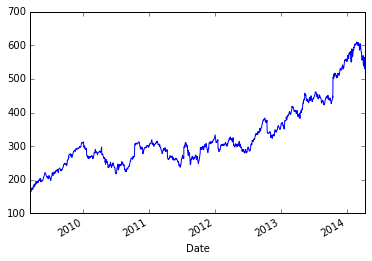

In [1]:
import math 
import numpy as np 
import pandas as pd
import pandas.io.data as web


goog = web.DataReader('GOOG', data_source='google',start='3/14/2009', end='4/14/2014')
print(goog.tail())

#pour ploter ici

%matplotlib inline
goog['Close'].plot(color='blue')


In [2]:
# On time execution :

#See chapter I book


# Introduction

In [21]:
#Importing data from googlefinance
#Real data (actual price) !!! 

from googlefinance import getQuotes
import json
print json.dumps(getQuotes('AAPL'), indent=2)
getQuotes('AMZN')

[
  {
    "Index": "NASDAQ", 
    "LastTradeWithCurrency": "99.16", 
    "LastTradeDateTime": "2016-06-08T11:48:33Z", 
    "LastTradePrice": "99.16", 
    "LastTradeTime": "11:48AM EDT", 
    "LastTradeDateTimeLong": "Jun 8, 11:48AM EDT", 
    "StockSymbol": "AAPL", 
    "ID": "22144"
  }
]


[{u'ID': u'660463',
  u'Index': u'NASDAQ',
  u'LastTradeDateTime': u'2016-06-08T11:48:18Z',
  u'LastTradeDateTimeLong': u'Jun 8, 11:48AM EDT',
  u'LastTradePrice': u'726.51',
  u'LastTradeTime': u'11:48AM EDT',
  u'LastTradeWithCurrency': u'726.51',
  u'StockSymbol': u'AMZN'}]

# Getting real market data

In [ ]:
# Get Real market data 

import urllib2  # works fine with Python 2.7.9 (not 3.4.+)
import json
import time
 
def fetchPreMarket(symbol, exchange):
    link = "http://finance.google.com/finance/info?client=ig&q="
    url = link+"%s:%s" % (exchange, symbol)
    u = urllib2.urlopen(url)
    content = u.read()
    #print(content)
    data = json.loads(content[3:])
    info = data[0]
    #t = str(info["elt"])    # time stamp
    t = str(info["lt_dts"])
    #l = float(info["l"])    # close price (previous trading day)
    l = float(info["l_fix"])
    #p = float(info["el"])   # stock price in pre-market (after-hours)
    return (t,l)
 
 
 # INDEXEURO:PX1
  # INDEXSP:.INX   
t, l= fetchPreMarket("PX1","INDEXEURO")
print(l)

p0 = 0
while True:
    t, l = fetchPreMarket(".INX","INDEXSP")
    print("%s\t%.2f\t%.2f\t%%" % (t, l, 1))
    time.sleep(10)




In [10]:

import urllib, time, os, re, csv
 
def fetchGF(googleticker):
    url="http://www.google.com/finance?&q="
    txt=urllib.urlopen(url+googleticker).read()
    #print(txt)
    k=re.search('id="ref_(.*?)">(.*?)<',txt)
    if k:
        tmp=k.group(2)
        q=tmp.replace(',','')
    else:
        q="Nothing found for: "+googleticker
    return q

print(time.ctime())
print
 
# Set local time zone to NYC
os.environ['TZ']='America/New_York'
time.tzset()
t=time.localtime() # string
print(time.ctime())
print


def combine(ticker):
    quote=fetchGF(ticker) # use the core-engine function
    t=time.localtime()    # grasp the moment of time
    output=[t.tm_year,t.tm_mon,t.tm_mday,t.tm_hour,  # build a list
            t.tm_min,t.tm_sec,ticker,quote]
    return output


ticker="INDEXSP%3A.INX" # You should choose the name of stock/index given in google finance


fname="new_d_i"
# remove a file, if exist
os.path.exists(fname) and os.remove(fname)


freq=1 # This the frequency of data flow 


with open(fname,'a') as f:
    writer=csv.writer(f,dialect="excel") #,delimiter=" ")
    while(t.tm_hour<=16):
        if(t.tm_hour==16):
            while(t.tm_min<01):
                #for ticker in tickers:
                    data=combine(ticker)
                    print(data)
                    writer.writerow(data)
                    time.sleep(freq)
            else:
                break
        else:
            data=combine(ticker)
            print(data)
            writer.writerow(data)
            time.sleep(freq)
 
f.close()


Wed Jul 13 13:31:16 2016

Wed Jul 13 09:31:16 2016

[2016, 7, 13, 9, 31, 16, 'INDEXSP%3A.INX', '2155.94']
[2016, 7, 13, 9, 31, 18, 'INDEXSP%3A.INX', '2155.96']
[2016, 7, 13, 9, 31, 19, 'INDEXSP%3A.INX', '2155.96']
[2016, 7, 13, 9, 31, 20, 'INDEXSP%3A.INX', '2155.94']
[2016, 7, 13, 9, 31, 21, 'INDEXSP%3A.INX', '2155.94']
[2016, 7, 13, 9, 31, 22, 'INDEXSP%3A.INX', '2155.94']
[2016, 7, 13, 9, 31, 24, 'INDEXSP%3A.INX', '2156.00']
[2016, 7, 13, 9, 31, 25, 'INDEXSP%3A.INX', '2156.00']
[2016, 7, 13, 9, 31, 26, 'INDEXSP%3A.INX', '2155.97']
[2016, 7, 13, 9, 31, 27, 'INDEXSP%3A.INX', '2155.97']
[2016, 7, 13, 9, 31, 28, 'INDEXSP%3A.INX', '2155.94']
[2016, 7, 13, 9, 31, 29, 'INDEXSP%3A.INX', '2155.96']
[2016, 7, 13, 9, 31, 31, 'INDEXSP%3A.INX', '2155.99']
[2016, 7, 13, 9, 31, 32, 'INDEXSP%3A.INX', '2156.00']
[2016, 7, 13, 9, 31, 33, 'INDEXSP%3A.INX', '2156.02']
[2016, 7, 13, 9, 31, 34, 'INDEXSP%3A.INX', '2156.05']
[2016, 7, 13, 9, 31, 35, 'INDEXSP%3A.INX', '2156.05']
[2016, 7, 13, 9, 31, 37, 'INDE

KeyboardInterrupt: 

# Part I : Introduction examples 

In [13]:
#####Black-Scholes-Merton (BSM) Formula (closed formula)


def bsm_call(S0,K,T,r,sigma):
    from math import log, sqrt, exp
    from scipy import stats
    S0 = float(S0)
    d1=(log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
    d2=(log(S0/K)+(r-0.5*sigma**2)*T)/(sigma*sqrt(T))
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)- K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0)) # stats.norm.cdf --> cumulative distribution function # for normal distribution
    return value

S0 = 100
K = 105
T = 1
r = 0.05
sigma = 0.2

bsm_call(S0,K,T,r,sigma)
#Implied volatility to see after with data 

#####Monte Carlo simulation - for option evaluation

from time import time
from math import exp, sqrt, log
from random import gauss, seed

seed(20000)
t0 = time()


S0 = 100. # initial value
K = 105. # strike price
T = 1.0 # maturity
r = 0.05 # riskless short rate sigma = 0.2 # volatility
M = 50 # number of time steps
dt = T / M # length of time interval 
I = 250000 # number of paths

# Simulating I paths with M time steps
S=[]

for i in range(I):
    path = []
    for t in range(M + 1):
        if t==0:
            path.append(S0)
        else:
            z = gauss(0.0, 1.0)
            St=path[t-1]*exp((r-0.5*sigma**2)*dt+ sigma * sqrt(dt) * z)
            path.append(St)
    S.append(path)
    
# Calculating the Monte Carlo estimator
C0 = exp(-r * T) * sum([max(path[-1] - K, 0) for path in S]) / I

# Results output
tpy = time() - t0
print "European Option Value %7.3f" % C0 
print "Duration in Seconds %7.3f" % tpy



European Option Value   7.999
Duration in Seconds  24.475


European Option Value   8.037
Duration in Seconds   0.731


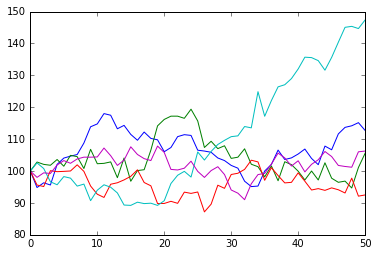

In [29]:

########## Vectorized code - Numpy

import numpy as np

v = np.arange(1, 6)
2*v

import math
from time import time

np.random.seed(20000)
t0 = time()

S0=100.;
K=105.;
T=1.0;
r=0.05;
sigma=0.2
M=50;
dt=T/M;
I=250000

S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    z = np.random.standard_normal(I) # pseudorandom numbers
    S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+ sigma * math.sqrt(dt) * z) # vectorized operation per time step over all paths
# Calculating the Monte Carlo estimator

C0 = math.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I # Results output
tnp1 = time() - t0

print "European Option Value %7.3f" % C0
print "Duration in Seconds %7.3f" % tnp1


##### Graphics 
%matplotlib inline

plt.plot(S[:, :10])

/Users/imadelhanafi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/imadelhanafi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()


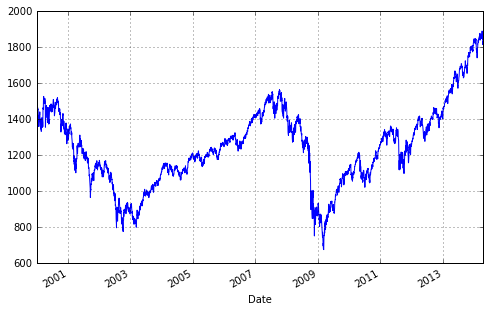

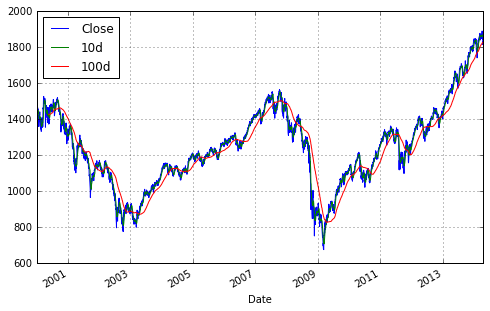

In [43]:
#### Technical analysis (on S&P500)

import numpy as np
import pandas as pd
import pandas.io.data as web

##Importing daily data

sp500 = web.DataReader('^GSPC', data_source='yahoo',start='1/1/2000', end='4/14/2014')

sp500['Close'].plot(grid=True, figsize=(8, 5))  # Plotting closing prices


sp500['10d'] = pd.rolling_mean(sp500['Close'], window=10)
sp500['100d'] = pd.rolling_mean(sp500['Close'], window=100)
sp500[['Close', '10d', '100d']].tail()


sp500[['Close', '10d', '100d']].plot(grid=True, figsize=(8, 5))

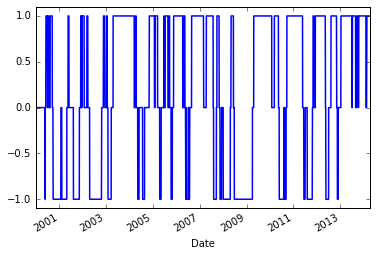

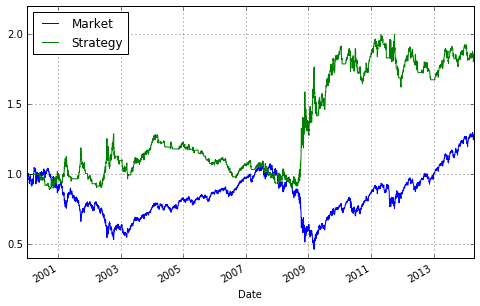

In [51]:
### A simple strategy based on the trend on 10day vs 100day

sp500['10-100'] = sp500['10d'] - sp500['100d']


SD=20
sp500['Regime'] = np.where(sp500['10-100'] > SD, 1, 0) 
sp500['Regime'] = np.where(sp500['10-100'] < -SD, -1,sp500['Regime']) 
sp500['Regime'].value_counts()

sp500['Regime'].plot(lw=1.5)
plt.ylim([-1.1, 1.1])


sp500['Market'] = np.log(sp500['Close'] / sp500['Close'].shift(1))
sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

sp500[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(8, 5))

# Part II : Machine Learning For Trading (course Udacity)



In [ ]:
# Data types and strcutures 


